In [7]:
from stop_words import get_stop_words
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("word_frequency.csv")

def generate_word_cloud(character):
    stop_words = set(get_stop_words('english'))
    stop_words.add("subtitle")
    
    char_data = df[df["Character"] == character]
    char_data_pruned = char_data[~char_data["Word"].isin(stop_words)]
    if char_data_pruned.empty:
        print(f"No dialogue found for {character}.")
        return
    
    word_freq = {row["Word"]: row["Count"] for _, row in char_data_pruned.iterrows()}
    
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {character}", fontsize=14)
    plt.show()


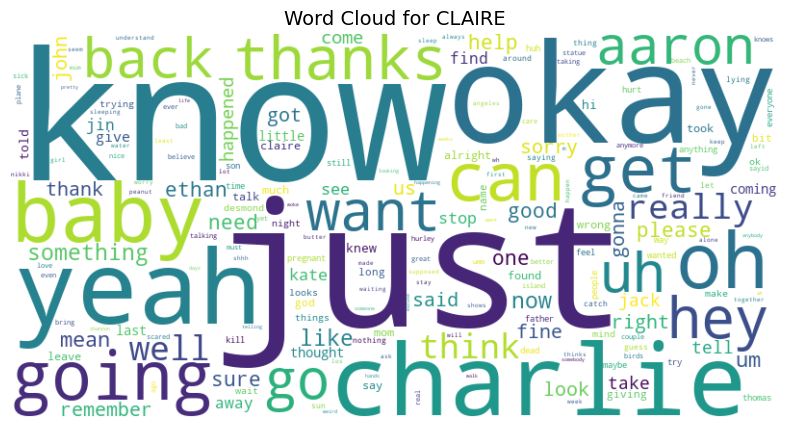

In [8]:
generate_word_cloud("CLAIRE")